## Polytope Extremes-DT Feature Extraction Polygon example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.


Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
!python3 ~/polytope-examples/desp-authentication.py -u <user_name> -p <password>

This will generate a token that can then be used by earthkit and polytope.

You can also run the script without arguments to enter your username and password.

In [ ]:
!python3 ~/polytope-examples/desp-authentication.py 

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install cf-units         (Optional for unit conversion in maps)

In [1]:
import earthkit.data
import earthkit.regrid

request = {
    "dataset": "extremes-dt",
    "class": "d1",
    "stream": "oper",
    "type": "fc",
    "date": "20250103",
    "time": "0000",
    "levtype": "sfc",
    "expver": "0001",
    "param": "165/167",
    "step": "1",
    "feature": {
        "type": "polygon",
        "shape": [[41.870881288,-8.8791360], [41.694339317422646, -8.824238614026456], [40.171924585721314, -8.902386975546364], [38.75694209400925, -9.493088042617785], [38.42424252381525, -9.171674240710018], [38.49907333213173, -8.676525850529856], [37.057269459205145, -8.971873318897366], [37.162874354643776, -7.406745406502978], [38.19776118392036, -6.931663452624974], [38.4280922170291, -7.321584397020473], [39.011852875635526, -6.9787177479519755], [39.66227871551288, -7.5393956904523804], [39.66568774825791, -7.03915852435145], [40.0019453234905, -6.883203763416162], [40.20373392742229, -7.035724907677206], [40.350463990828985, -6.8135246275213035], [41.030499770212515, -6.905947651233703], [41.593647729084154, -6.22847017956974], [41.67712153119277, -6.544984134823352], [41.949682257268876, -6.567927092516641], [41.96960294343674, -7.1747800681640115], [41.88337981339092, -7.196871678410446], [41.81334515396762,-8.156666519264604], [42.14242723772878, -8.205142297350534], [41.870881288,-8.8791360]],
    },
}

#data is an earthkit streaming object but with stream=False will download data immediately 
ds = earthkit.data.from_source("polytope", "polytope", request, stream=False, address='polytope-test.lumi.apps.dte.destination-earth.eu')


2025-01-20 15:21:40 - INFO - Key read from /home/maaw/.polytopeapirc
2025-01-20 15:21:40 - INFO - Sending request...
{'request': 'class: d1\n'
            'dataset: extremes-dt\n'
            "date: '20250103'\n"
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - 41.870881288\n'
            '    - -8.879136\n'
            '  - - 41.694339317422646\n'
            '    - -8.824238614026456\n'
            '  - - 40.171924585721314\n'
            '    - -8.902386975546364\n'
            '  - - 38.75694209400925\n'
            '    - -9.493088042617785\n'
            '  - - 38.42424252381525\n'
            '    - -9.171674240710018\n'
            '  - - 38.49907333213173\n'
            '    - -8.676525850529856\n'
            '  - - 37.057269459205145\n'
            '    - -8.971873318897366\n'
            '  - - 37.162874354643776\n'
            '    - -7.406745406502978\n'
            '  - - 38.19776118392036\n'
            '    - -6.931663

f16682b9-fb8d-4243-9683-4736275a74a2.covjson:   0%|          | 0.00/339k [00:00<?, ?B/s]

In [2]:
ds._json()

{'type': 'CoverageCollection',
 'domainType': 'MultiPoint',
 'coverages': [{'mars:metadata': {'class': 'd1',
    'dataset': 'extremes-dt',
    'Forecast date': '2025-01-03T00:00:00Z',
    'expver': '0001',
    'levtype': 'sfc',
    'step': '1',
    'stream': 'oper',
    'type': 'fc',
    'number': 0},
   'type': 'Coverage',
   'domain': {'type': 'Domain',
    'axes': {'t': {'values': ['2025-01-03T00:00:00Z']},
     'composite': {'dataType': 'tuple',
      'coordinates': ['x', 'y', 'z'],
      'values': [[37.068645433724, 351.059602649007, 0],
       [37.068645433724, 351.119205298013, 0],
       [37.068645433724, 351.17880794702, 0],
       [37.103798250569, 351.053677932406, 0],
       [37.103798250569, 351.113320079523, 0],
       [37.103798250569, 351.17296222664, 0],
       [37.103798250569, 351.232604373757, 0],
       [37.103798250569, 351.292246520875, 0],
       [37.103798250569, 351.351888667992, 0],
       [37.103798250569, 351.411530815109, 0],
       [37.103798250569, 351.4

In [3]:
# Convert data to xarray
ds.to_xarray()

<xarray.Dataset> Size: 209kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 4353)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-01-03T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) <U1 4B '1'
  * points     (points) int64 35kB 0 1 2 3 4 5 ... 4347 4348 4349 4350 4351 4352
    x          (points) float64 35kB 37.07 37.07 37.07 37.1 ... 42.06 42.1 42.1
    y          (points) float64 35kB 351.1 351.1 351.2 ... 351.8 351.7 351.8
    z          (points) float64 35kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    10u        (datetimes, number, steps, points) float64 35kB -3.247 ... 1.134
    2t         (datetimes, number, steps, points) float64 35kB 284.8 ... 282.8
Attributes:
    class:          d1
    dataset:        extremes-dt
    Forecast date:  2025-01-03T00:00:00Z
    expver:         0001
    levtype:        sfc
    step:           1
    stream:         oper
    type:           fc
    number:         0
    date:           2025-01-03T00:00:00Z

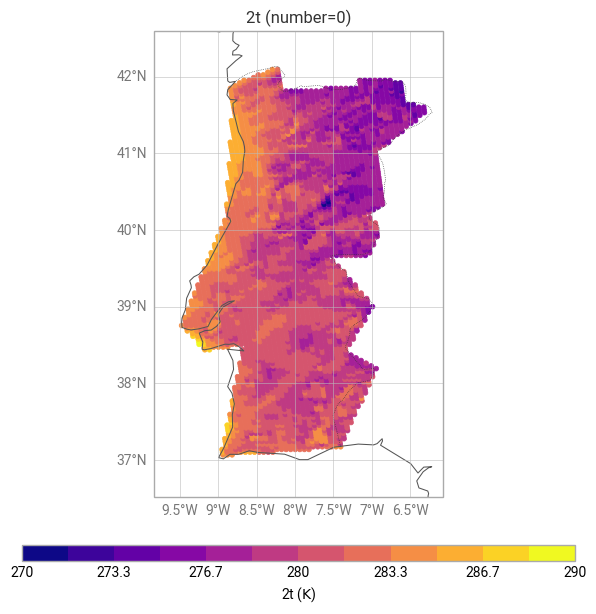

In [5]:
da = ds.to_xarray()
import earthkit.plots
chart = earthkit.plots.Map(domain="Portugal")
chart.point_cloud(da['2t'], x="y", y="x")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()